In [1]:
%matplotlib inline


# Car accelerating on a linear track


In [2]:
from rockit import *
from numpy import sin, pi
from casadi import vertcat
import numpy as np
import matplotlib.pyplot as plt

ocp = Ocp(T=FreeTime(1.0))

# Define constants
m = 500
c = 2
d = 1000

# Define states
p = ocp.state()
v = ocp.state()

# Defince controls
F = ocp.control()

# Specify ODE
ocp.set_der(p, v)
ocp.set_der(v, 1/m * (F - c * v**2))

# Lagrange objective
ocp.add_objective(ocp.T)

# Define parameters
F_max = ocp.parameter(grid='control')
p0 = ocp.parameter()

# Path constraints
ocp.subject_to(-F_max <= (F<= F_max))
ocp.subject_to(v >= 0)

# Initial constraints
ocp.subject_to(ocp.at_t0(p)==p0)
ocp.subject_to(ocp.at_t0(v)==0)

# End constraints
ocp.subject_to(ocp.at_tf(p)==d)
ocp.subject_to(ocp.at_tf(v)==0)

# Pick a solver
ocp.solver('ipopt')

# Choose a solution method
ocp.method(MultipleShooting(N=20,M=1,intg='rk'))

# Set values for parameters
ocp.set_value(p0, 1)
ocp.set_value(F_max, 2500*np.ones(20))

# Translate problem to function
T = ocp.value(ocp.T)
states = ocp.sample(vertcat(p,v),grid='control')[1]
controls = ocp.sample(F,grid='control-')[1]
test = ocp.to_function('test', [p0, ocp.sample(F_max,grid='control-')[1], T, states, controls], [ocp.sample(F,grid='control')[1], T, states, controls])

# Initial value
sol_T = 1.0
sol_states = 0
sol_controls = 0

# Solve problem for different values for parameters, initializing with previous solution
signal1, sol_T, sol_states1, sol_controls = test(0, 2500*np.ones(20), sol_T, sol_states, sol_controls)
signal2, sol_T, sol_states2, sol_controls = test(0, 2500*np.ones(20), sol_T, sol_states1, sol_controls)
signal3, sol_T, sol_states3, sol_controls = test(0, 2000*np.ones(20), sol_T, sol_states2, sol_controls)


print(signal1[:4], sol_states1[:4])
print(signal2[:4], sol_states2[:4])
print(signal3[:4], sol_states3[:4])


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      184
Number of nonzeros in inequality constraint Jacobian.:       43
Number of nonzeros in Lagrangian Hessian.............:      101

Total number of variables............................:       63
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       44
Total number of inequality c

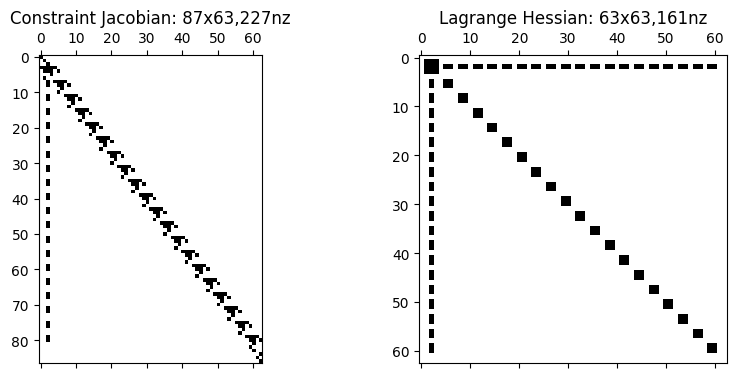

In [3]:
ocp.spy()